## 알고리즘 체인과 파이프라인

In [1]:
import matplotlib.pyplot as plt
import mglearn

plt.rcParams["figure.dpi"] = 100
# plt.rcParams["axes.facecolor"] = 'lightgray'
plt.rcParams["font.family"] = "NanumGothic"

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
# 데이터 적재와 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# 훈련 데이터의 최솟값, 최댓값을 계산합니다
scaler = MinMaxScaler().fit(X_train)

# 훈련 데이터의 스케일을 조정합니다
X_train_scaled = scaler.transform(X_train)

svm = SVC()
# 스케일 조정된 훈련데이터에 SVM을 학습시킵니다
svm.fit(X_train_scaled, y_train)
# 테스트 데이터의 스케일을 조정하고 점수를 계산합니다
X_test_scaled = scaler.transform(X_test)
print("테스트 점수: {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 점수: 0.97


In [20]:
#위의 내용을 세 줄로 완성
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("scaler", MinMaxScaler()),  # 파이프라인은 데이터 들어오면 sclaler, svm 할 수 있도록 한다 # fit -> transform(scaler), fit -> transform -> .... -> fit -> predict(svc) (마지막은 predict로 끝나야 함)
                     ("svm", SVC())])
pipeline.fit(X_train, y_train) # fit transform fit 하고 멈춤(predict 안함)
pipeline.score(X_test, y_test) # 최종모델의 score 호출(마지막요소 호출)

0.972027972027972

### 데이터 전처리와 매개변수 선택

In [22]:
from sklearn.model_selection import GridSearchCV

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train) # 전체(트레인+테스트) 데이터가 트레인으로 바뀐 것 -> 문제. 테스트 데이터는 제거해야되는데 했으므로 scaler가 잘못된 것. validation부분은 잘려야 함
# 작업의 처리 상 밑의 그리드서치 파이프로 하면 된다

print("최상의 교차 검증 정확도: {:.2f}".format(grid.best_score_))
print("테스트 점수: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수: ", grid.best_params_)

최상의 교차 검증 정확도: 0.98
테스트 점수: 0.97
최적의 매개변수:  {'C': 1, 'gamma': 1}


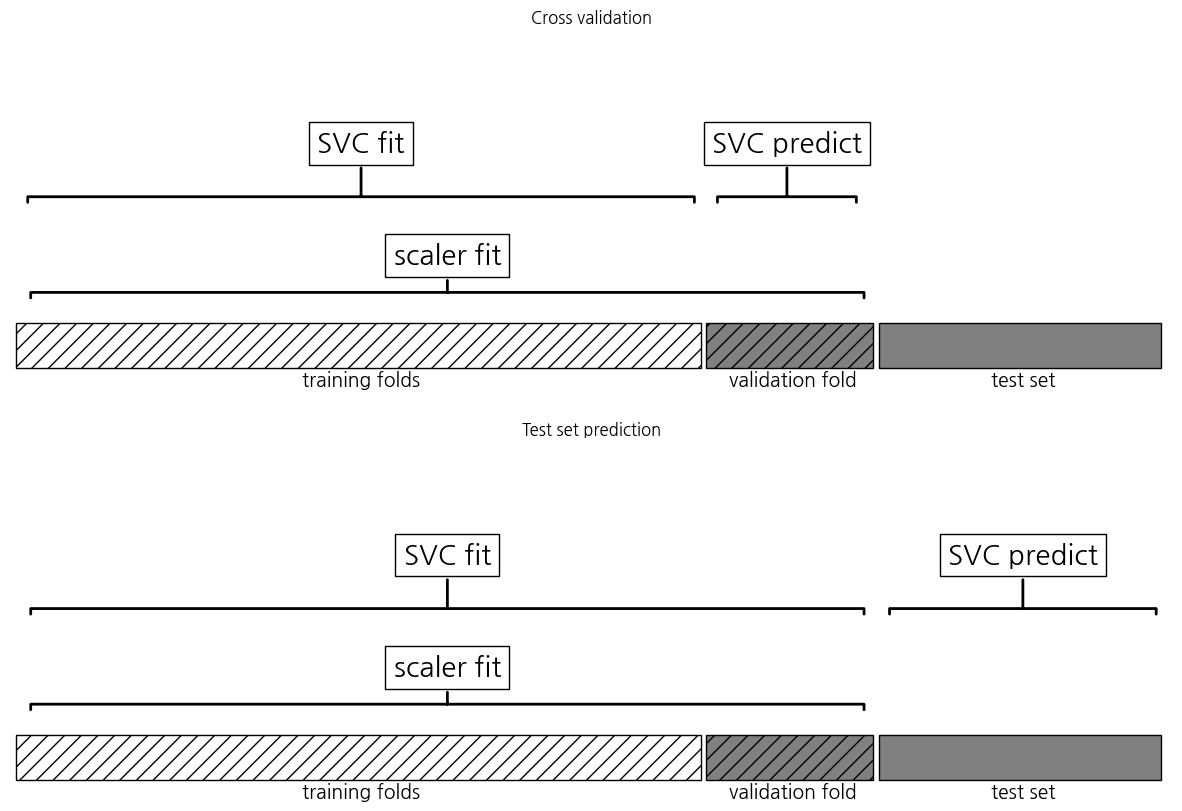

In [23]:
mglearn.plots.plot_improper_processing()

### 파이프라인 구축하기

In [33]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), 
                 ("svm", SVC())])

In [34]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [35]:
print("테스트 점수: {:.2f}".format(pipe.score(X_test, y_test)))

테스트 점수: 0.97


### 그리드 서치에 파이프라인 적용하기

In [27]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [28]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 정확도: {:.2f}".format(grid.best_score_))
print("테스트 세트 점수: {:.2f}".format(grid.score(X_test, y_test)))
print("최적의 매개변수: {}".format(grid.best_params_))

최상의 교차 검증 정확도: 0.98
테스트 세트 점수: 0.97
최적의 매개변수: {'svm__C': 1, 'svm__gamma': 1}


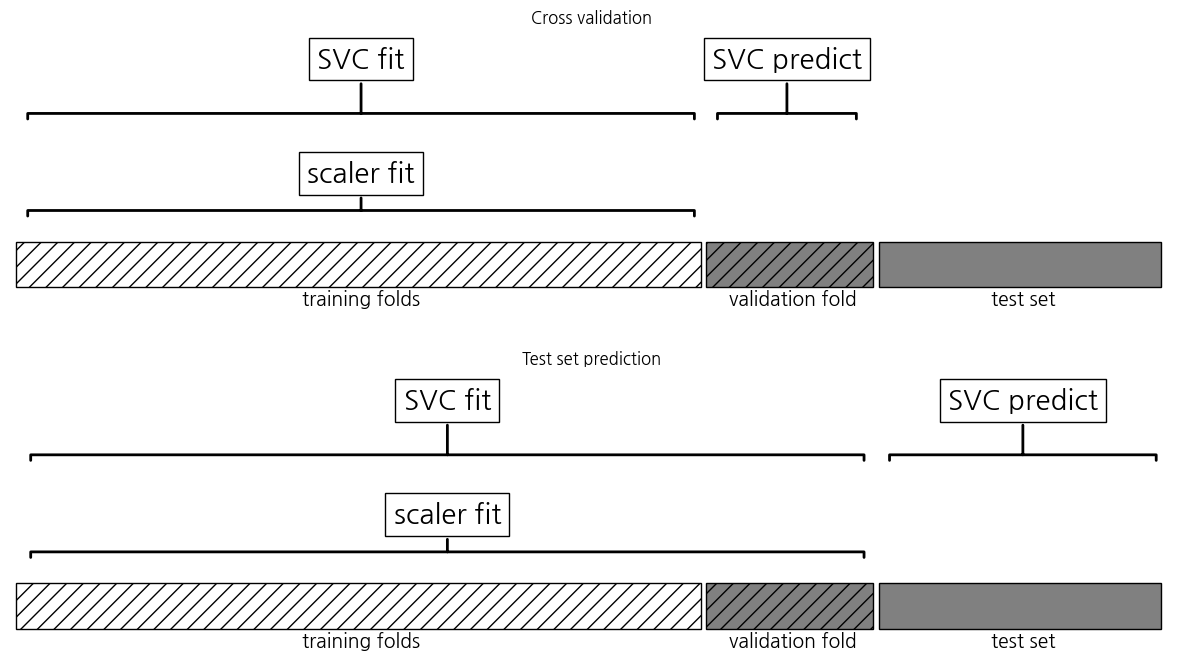

In [29]:
mglearn.plots.plot_proper_processing()

#### `make_pipleline`을 사용한 파이프라인 생성

In [37]:
from sklearn.pipeline import make_pipeline
# 표준 방법
pipe_long = Pipeline([("scaler", MinMaxScaler()), 
                      ("svm", SVC(C=100))])
# 간소화된 방법
pipe_short = make_pipeline(MinMaxScaler(), 
                           SVC(C=100))

In [38]:
print("파이프라인 단계:\n{}".format(pipe_short.steps))

파이프라인 단계:
[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("파이프라인 단계:\n{}".format(pipe.steps))

파이프라인 단계:
[('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]
